In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from sympy import (Symbol, Function, init_printing, log, 
                   exp, diff, simplify, Eq, Rational,
                   latex, factor, plot_implicit)
from sympy.solvers import solve

from IPython.display import Math

init_printing(use_latex='mathjax')

### Notations
* $S$ : Dimentionless Thermodynamic Entropy
* $N$ : Number of particles
* $G$ : Number of cells
* $X$ : Number of adsorped particles
* $Y$ : Number of particles per cell i.e. $\frac{N}{G}$

### Thermodynamic Entropy

In [2]:
# Define thermodynamic entropy S.
N, G = Symbol('N'), Symbol('G')
X, Y = Symbol('X'), Symbol('Y')
An = Function('A')(N)

Fn = An + N
S  = -(Fn * log(Fn)) + (An * log(An)) + (N * log(N))
Eq(Symbol('S'), S)

S = N⋅log(N) - (N + A(N))⋅log(N + A(N)) + A(N)⋅log(A(N))

Differnetiate entropy $S$ w.r.t. number of particles $N$.

In [3]:
# Differnetiate entropy S w.r.t number of particles N.
Sn = simplify(diff(S, N))
Eq(Symbol('\partial S') / Symbol('\partial N'), Sn)

\partial S     ⎛d           ⎞                                    d       
────────── = - ⎜──(A(N)) + 1⎟⋅log(N + A(N)) + log(N) + log(A(N))⋅──(A(N))
\partial N     ⎝dN          ⎠                                    dN      

### Adsorption

Put $ \frac{\partial S}{\partial N} = \log X $ and solve for $X$, where $X$ represents adsoption for particles.

In [4]:
# Solve X in terms of G and Nf.
Xn = simplify(solve(log(X) - Sn, X)[0])
Eq(Symbol('X'), Xn)


                                    d       
       -(log(N + A(N)) - log(A(N)))⋅──(A(N))
                                    dN      
    N⋅ℯ                                     
X = ────────────────────────────────────────
                    N + A(N)                

#### Additive Approach

In [5]:
w1, w2, a1, a2, b = Symbol('w_1'), Symbol('w_2'), Symbol('a_1'), Symbol('a_2'), Symbol('b') 
expra = G * (w1 * (1 + a1 * N/G) ** (b) + w2 * (1 + a2 * N/G) ** (b)) ** (1/b)
expra = expra.subs({w1: 0.4, w2: 0.6, a1: 0, a2:-1, b:1})
Xa = simplify(Xn.subs(An, expra))
Eq(Symbol('X_a'), Xa)

DAn = simplify(diff(expra, N))
Xa = (1+N/expra)**(-DAn)*(1+expra/N)**(-1)
Eq(Symbol('X_a'), Xa)

                          0.6
     ⎛           N       ⎞   
     ⎜1 + ───────────────⎟   
     ⎜      ⎛      0.6⋅N⎞⎟   
     ⎜    G⋅⎜1.0 - ─────⎟⎟   
     ⎝      ⎝        G  ⎠⎠   
Xₐ = ────────────────────────
         ⎛      0.6⋅N⎞       
       G⋅⎜1.0 - ─────⎟       
         ⎝        G  ⎠       
       ─────────────── + 1   
              N              

Put $N = G*Y$ and simplify.

In [6]:
Xa = simplify(Xa.subs(N, G*Y)).subs({G:1})
Eq(Symbol('X_a'), Xa)

                     0.6
       ⎛-0.4⋅Y - 1.0⎞   
     Y⋅⎜────────────⎟   
       ⎝0.6⋅Y - 1.0 ⎠   
Xₐ = ───────────────────
         0.4⋅Y + 1.0    

Plot $Y$ against $X_a$.

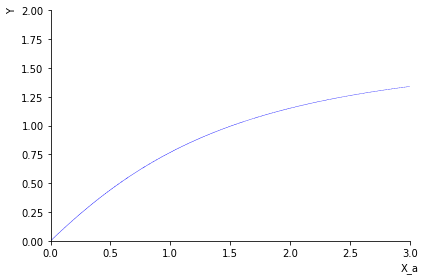

In [7]:
plot_implicit(Eq(Symbol('X_a'), Xa), (Symbol('X_a'), 0.0, 3.0), (Y, 0.0, 2.0))

#### Multiplicative Approach

In [8]:
w1, w2, a1, a2, b = Symbol('w_1'), Symbol('w_2'), Symbol('a_1'), Symbol('a_2'), Symbol('b') 
exprm = G* (1 + a1 * N/G )** (w1) * (1 + a2 * N/G )** (w2)
exprm = exprm.subs({w1:0.4, w2:0.6, a1: 0, a2:-1, b:1})
Xm = simplify(Xn.subs(An, exprm))
Eq(Symbol('X_m'), Xm)

DAm = simplify(diff(exprm, N))
Xm = (1+N/exprm)**(-DAm)*(1+exprm/N)**(-1)
Eq(Symbol('X_m'), Xm)

                                   -0.4
                            ⎛G - N⎞    
                        0.6⋅⎜─────⎟    
                            ⎝  G  ⎠    
     ⎛             -0.6⎞               
     ⎜      ⎛    N⎞    ⎟               
     ⎜    N⋅⎜1 - ─⎟    ⎟               
     ⎜      ⎝    G⎠    ⎟               
     ⎜1 + ─────────────⎟               
     ⎝          G      ⎠               
Xₘ = ──────────────────────────────────
                       0.6             
                ⎛    N⎞                
              G⋅⎜1 - ─⎟                
                ⎝    G⎠                
              ──────────── + 1         
                   N                   

Put $N = G*Y$ and simplify.

In [9]:
Xm = simplify(Xm.subs(N, G*Y)).subs({G:1})
Eq(Symbol('X_m'), Xm)

                                     -0.4
                          0.6⋅(1 - Y)    
       ⎛         -0.6    ⎞               
     Y⋅⎝Y⋅(1 - Y)     + 1⎠               
Xₘ = ────────────────────────────────────
                           0.6           
                Y + (1 - Y)              

Plot $Y$ against $X_m$.

c:\users\dell\desktop\test_environment_python\lib\site-packages\sympy\plotting\intervalmath\lib_interval.py:30: RuntimeWarning: overflow encountered in exp
  return interval(np.exp(x.start), np.exp(x.end), is_valid=x.is_valid)


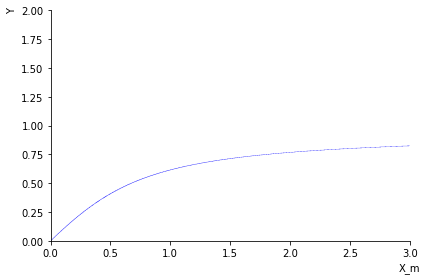

In [10]:
p2 = plot_implicit(Eq(Symbol('X_m'), Xm), (Symbol('X_m'), 0.0,3.0), (Y, 0.0, 2.0))